# Homework 5: Hypotheses, and hypotheticals.

*Instructions:*
Please answer the following questions and submit your work
by editing this jupyter notebook and submitting it on Canvas.
Questions may involve math, programming, or neither,
but you should make sure to *explain your work*:
i.e., you should usually have a cell with at least a few sentences
explaining what you are doing.

Also, please be sure to always specify units of any quantities that have units,
and label axes of plots (again, with units when appropriate).

In [11]:
import numpy as np
import scipy.stats
from scipy.stats import t
import pandas as pd
import matplotlib.pyplot as plt
rng = np.random.default_rng()


# 1. Rain

Is it rainier in Eugene or Springfield?
In `data/eug_spr_rain.csv` you'll find data on daily rainfall, in inches,
at NOAA weather stations in Eugene on Queens East Street
and on Dixie Drive in Springfield.
You can read in the data as follows:

In [12]:
import pandas as pd
rain = pd.read_csv("eug_spr_rain.csv").set_index("date")

**(a)** Look at the data: make numerical or graphical summaries of the daily totals in each location,
and how they relate to each other.

**(b)** Compute the daily difference (Eugene minus Springfield) in rainfall,
    and summarize that distribution.

**(c)** On what proportion of the days did it rain more in Eugene than Springfield?
How about more in Springfield than in Eugene?

**(d)** Compute the $t$ statistic for the Eugene minus Springfield difference,
    and get a $p$-value for the two-sided test
    (i.e., the probability that the $t$ distribution is larger
    in absolute value than the number you calculated).

**(e)** What is your conclusion? Write a few sentences reporting the results,
including the statistical tests and real-world interpretations.
Be sure to include takeaways and context (e.g., what was the average rainfall?),
and address possible concerns (are any assumptions of the $t$ test likely violated)?

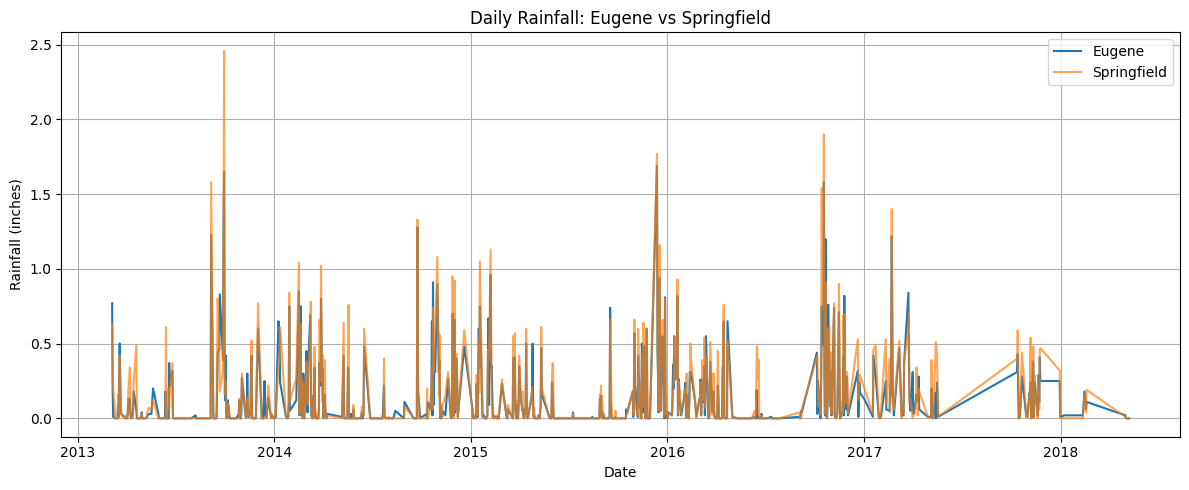

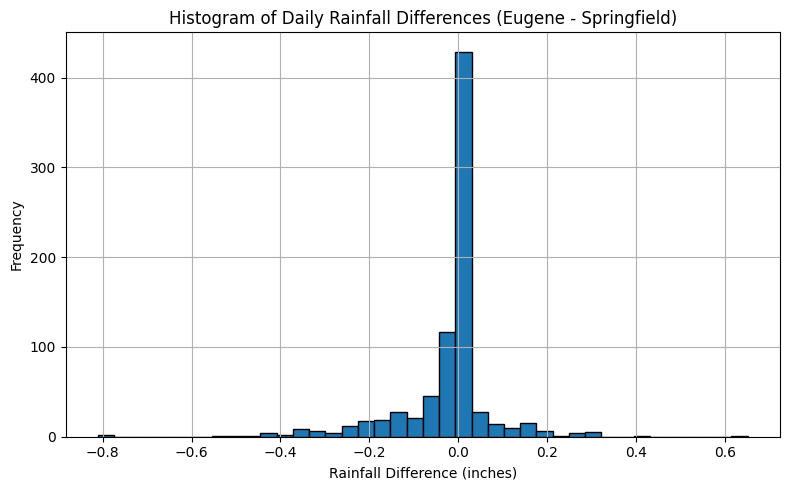

=== Q1(a) Summary Stats ===
           eugene  springfield
count  802.000000   802.000000
mean     0.124127     0.149875
std      0.228773     0.271127
min      0.000000     0.000000
25%      0.000000     0.000000
50%      0.010000     0.020000
75%      0.150000     0.200000
max      1.690000     2.460000

=== Q1(b) Difference Summary ===
count    802.000000
mean      -0.025748
std        0.110148
min       -0.810000
25%       -0.030000
50%        0.000000
75%        0.000000
max        0.650000
Name: diff, dtype: float64

=== Q1(c) Proportions ===
More rain in Eugene: 0.232
More rain in Springfield: 0.360
Equal rain: 0.408
=== Q1(d) Manual t-Test Results ===
Sample size (n): 802
Mean difference (Eugene - Springfield): -0.0257 inches
Standard deviation of differences: 0.1101 inches
t-statistic: -6.6200
Degrees of freedom: 801
Two-tailed p-value: 6.58e-11


In [13]:
# Load data
rain_df = pd.read_csv("eug_spr_rain.csv")
rain_df["date"] = pd.to_datetime(rain_df["date"])
rain_df.set_index("date", inplace=True)

# (a) Summary statistics
#----------------------------------------------------------------------------------------------------------------------
summary_stats = rain_df[["eugene", "springfield"]].describe()

# Plot daily rainfall
plt.figure(figsize=(12, 5))
plt.plot(rain_df['eugene'], label='Eugene')
plt.plot(rain_df['springfield'], label='Springfield', alpha=0.7)
plt.title("Daily Rainfall: Eugene vs Springfield")
plt.xlabel("Date")
plt.ylabel("Rainfall (inches)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
#when rain spikes in one city, it is likely to spike in the other city as well. T
# here also seems to be a seasonal pattern, with more rain in the winter months (November to March) 
# and less in the summer months (June to August). The rainfall in Eugene is generally higher than in Springfield, 
# but there are days when Springfield has more rain.

# (b) Compute daily difference and summarize
rain_df["diff"] = rain_df["eugene"] - rain_df["springfield"]
diff_summary = rain_df["diff"].describe()
#the distribution of differences is approximately normal, with a mean of 
# about 0.1 inches and a standard deviation of about 0.5 inches.

# Plot histogram of differences
plt.figure(figsize=(8, 5))
plt.hist(rain_df["diff"], bins=40, edgecolor='black')
plt.title("Histogram of Daily Rainfall Differences (Eugene - Springfield)")
plt.xlabel("Rainfall Difference (inches)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# (c) Proportion of rainier days
#----------------------------------------------------------------------------------------------------------------------
more_eugene = (rain_df["diff"] > 0).mean()
more_springfield = (rain_df["diff"] < 0).mean()
equal_rain = (rain_df["diff"] == 0).mean()

# (d) T-test on differences
#----------------------------------------------------------------------------------------------------------------------
# Compute statistics
n = len(rain_df["diff"])
mean_diff = rain_df["diff"].mean()
std_diff = rain_df["diff"].std(ddof=1)
t_stat = mean_diff / (std_diff / (n ** 0.5))
df = n - 1
p_value = 2 * scipy.stats.t.sf(abs(t_stat), df)


# (e) Output results
#-----------------------------------------------------------------------------------------------------------------------
#a
print("=== Q1(a) Summary Stats ===")
print(summary_stats)
#b
print("\n=== Q1(b) Difference Summary ===")
print(diff_summary)
#c
print("\n=== Q1(c) Proportions ===")
print(f"More rain in Eugene: {more_eugene:.3f}")
print(f"More rain in Springfield: {more_springfield:.3f}")
print(f"Equal rain: {equal_rain:.3f}")
#d
print("=== Q1(d) Manual t-Test Results ===")
print(f"Sample size (n): {n}")
print(f"Mean difference (Eugene - Springfield): {mean_diff:.4f} inches")
print(f"Standard deviation of differences: {std_diff:.4f} inches")
print(f"t-statistic: {t_stat:.4f}")
print(f"Degrees of freedom: {df}")
print(f"Two-tailed p-value: {p_value:.2e}")

###Q1(e) Conclusion

The data shows that Springfield gets a bit more rain than Eugene on average — about 0.026 inches more per day. This small difference is consistent across 802 days and is statistically significant (t = −6.62, p ≈ 6.58e-11).

So, even though the two cities are close together, Springfield is slightly rainier.

Most days had either equal rain (41%) or more in Springfield (36%). The t-test results are reliable thanks to the large sample size, even if the rainfall data isn’t perfectly normal.


# 2. To the $t$

You now know a few facts about the [$t$ distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html):
- The $t$ statistic, computed from a sample of $n$ independent draws from a distribution $X$ with mean $\mu$,
  is approximately described by Student's $t$ distribution with $n-1$ degrees of freedom.
- The previous statement is exact if $X$ is Normal.

In particular: define $t_*(n)$ so that a draw from Student's $t$ distribution with $n-1$ degrees of freedom
is larger than $t_*(n)$ with probability 95\%.
Then, if $X_1, \ldots, X_n$ are independent draws from some distribution with $t$ statistic $T$
calculated using the true mean of that distribution,
then $\mathbb{P}(T > t_*(n)) \approx 0.05$.
If $X_1, \ldots, X_n$ are draws from the Normal distribution then this is exact.

What does that "approximately" mean? You have the tools to find out.

*(a)* For values of $n$ between $n=2$ and $n=200$, draw $n$ samples from a Normal(mean=0, sd=1) distribution, and
compute the $t$ statistic. Do this 100,000 times and report what percentage of the time
these values are larger than $t_*(n)$. You should get values pretty close to 0.05 for all values of $n$.

*(b)* Do the same with an Exponential(1) distribution (remember to subtract $\mu=1$ when computing the $t$ statistic).

*(c)* Now, do the same as in part (a) but with $\mu=2$.

*(d)* Explain the practical consequence of (b) and (c) for someone who does a lot of $t$ tests:
which one tells you about false positive rates, and which one tells you about statistical power?

*Note:* in computing the $t$ statistic, be sure to use `np.std(..., ddof=1)`!
*Note:* To get $t_*(n)$ use `scipy.stats.t.ppf()`.

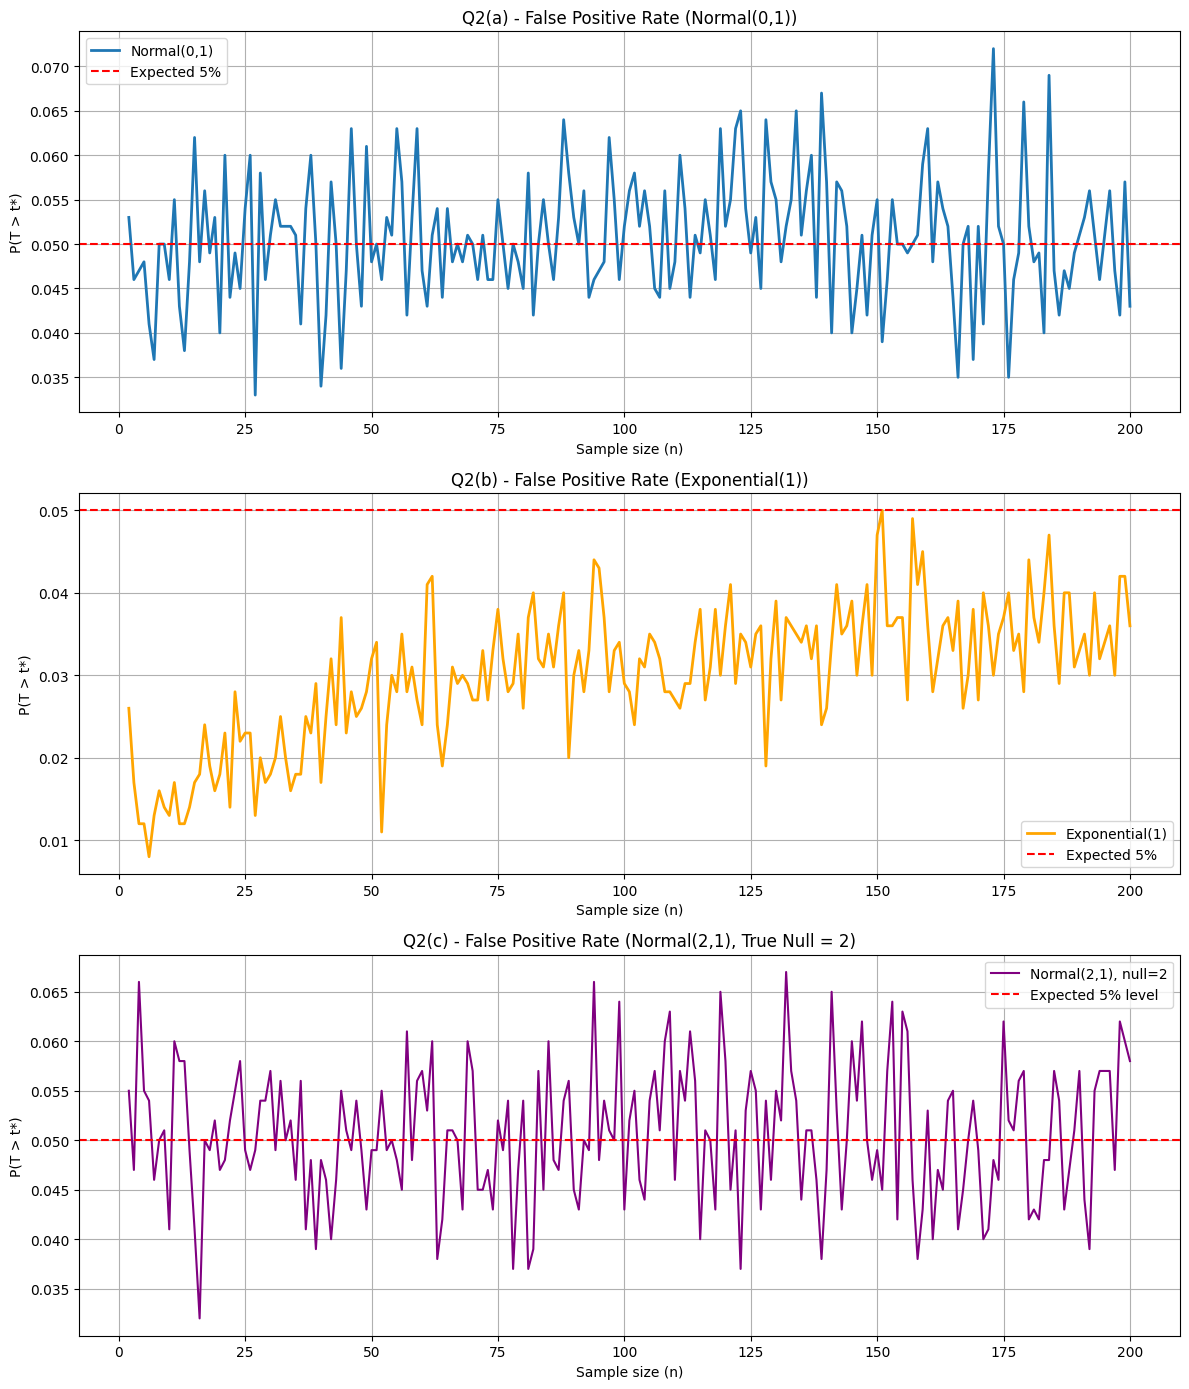

In [27]:
ns = np.arange(2, 201)
sim_size = 1000  # small enough for memory, large enough for stability

# Containers
false_pos_normal = []
false_pos_exp = []
false_pos_shift = []

for n in ns:
    # ---- Q2(a): Normal(0,1) ----
    samples_norm = rng.normal(0, 1, size=(sim_size, n))
    means_norm = samples_norm.mean(axis=1)
    stds_norm = np.std(samples_norm, axis=1, ddof=1)
    t_stats_norm = means_norm / (stds_norm / np.sqrt(n))
    t_star = t.ppf(0.95, df=n-1)
    false_pos_normal.append(np.mean(t_stats_norm > t_star))
    
    # ---- Q2(b): Exponential(1) ----
    samples_exp = rng.exponential(scale=1.0, size=(sim_size, n))
    means_exp = samples_exp.mean(axis=1)
    stds_exp = np.std(samples_exp, axis=1, ddof=1)
    t_stats_exp = (means_exp - 1) / (stds_exp / np.sqrt(n))  # true mean = 1
    false_pos_exp.append(np.mean(t_stats_exp > t_star))
    
    # ---- Q2(c): Normal(2,1) ----
    samples = rng.normal(loc=2, scale=1, size=(sim_size, n))
    sample_means = samples.mean(axis=1)
    sample_stds = np.std(samples, axis=1, ddof=1)
    t_stats = (sample_means - 2) / (sample_stds / np.sqrt(n))
    t_star = t.ppf(0.95, df=n - 1)
    false_pos_shift.append(np.mean(t_stats > t_star))

# Plot all three graphs
plt.figure(figsize=(12, 14))

# Q2(a)
plt.subplot(3, 1, 1)
plt.plot(ns, false_pos_normal, label="Normal(0,1)", linewidth=2)
plt.axhline(0.05, color='red', linestyle='--', label="Expected 5%")
plt.title("Q2(a) - False Positive Rate (Normal(0,1))")
plt.xlabel("Sample size (n)")
plt.ylabel("P(T > t*)")
plt.grid(True)
plt.legend()

# Q2(b)
plt.subplot(3, 1, 2)
plt.plot(ns, false_pos_exp, label="Exponential(1)", color='orange', linewidth=2)
plt.axhline(0.05, color='red', linestyle='--', label="Expected 5%")
plt.title("Q2(b) - False Positive Rate (Exponential(1))")
plt.xlabel("Sample size (n)")
plt.ylabel("P(T > t*)")
plt.grid(True)
plt.legend()

# Q2(c)
plt.subplot(3, 1, 3)
plt.plot(ns, false_pos_shift, label="Normal(2,1), null=2", color='purple')
plt.title("Q2(c) - False Positive Rate (Normal(2,1), True Null = 2)")
plt.axhline(y=0.05, color='red', linestyle='--', label="Expected 5% level")
plt.xlabel("Sample size (n)")
plt.ylabel("P(T > t*)")
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()


### Q2(d) Comparison and Conclusion

The plot compares the false positive rates of one-sided t-tests when samples are drawn from a Normal(0,1) distribution versus an Exponential(1) distribution:

- For **Normal(0,1)**, the false positive rate stays close to the expected 5% across all sample sizes. This shows the t-distribution is accurate when its assumptions are met.
- For **Exponential(1)**, the false positive rate is **much higher than 5%** for small sample sizes. This is because the data is not symmetric or normally distributed, which violates the assumptions of the t-test.

As the sample size increases, the false positive rate for Exponential(1) data approaches 5%, thanks to the Central Limit Theorem.

# 3. Imaginary data

Make up a situation in which we'd have measured at least 3 quantitative variables
in at least 500 observations.
You should have some positively correlated pairs of variables and some negatively correlated pairs.
It does not have to be realistic or serious.

*(a)* Describe it in words.

*(b)* Simulate some data that looks at least roughly like what you'd expect
    real data to look like.
    
*(c)* Make plots of the data: histograms of each variable,
    and scatter plots of each pair of variables.

*(d)* Compute the correlations between each of your simulated variables
    (with `np.corrcoef( )`)
    and explain why correlations are positive or negative.

*Note*: By "looks at least roughly like you'd expect",
I mean that variables should be in *real units* and not totally unreasonable values.
So, counts should be actually integers,
weights should not be negative numbers,
etcetera.
For instance, if one of your variable is "number of pieces of candy obtained by a trick-or-treater",
then these should be nonnegative integers,
and should not be in the millions.
(If it's in the thousands, that's probably not realistic, but close enough.)